# UTILIZING DATA SCIENCE TO FORECAST RAIN

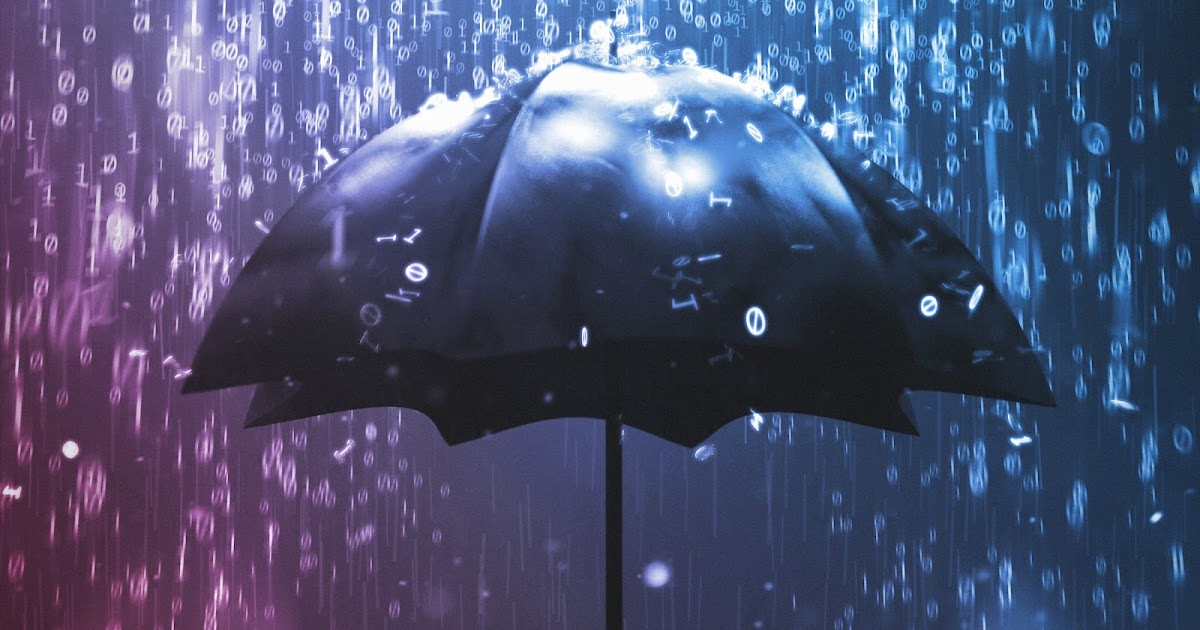

## Overview
This project revolvs around leveraging historical weather data to forecast conditions in Nairobi. Key aspects include data preprocessing, encompassing cleaning and feature engineering, to enhance the dataset's quality. Various machine learning algorithms were applied to build a robust predictive model, focusing on rain prediction. Evaluation metrics and validation techniques ensured model effectiveness, helping those sectors which were most dependent on weather, such as agriculture.

## Business Understanding
The challenge at hand is to improve the accuracy of rainfall predictions for Nairobi, utilizing a decade's worth of historical weather records. Current prediction methods often fall short of providing precise forecasts tailored to Nairobi's unique climatic conditions, emphasizing the need for a robust predictive model.

## Data Understanding

Source of Data:
The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package), containing weather data from 1970 to 1999.

Description of Data:
The dataset includes various details about weather conditions, such as Temperature, Rainfall, Evaporation, Sunshine, WindGust Direction, WindGust Speed, Wind Direction, Humidity, Pressure, Cloud and Location.

1. **General Objective**

To develop a machine learning model for accurate rainfall prediction. 

2. **Specific Objectives**

i. To pre-process and analyze the extensive historical weather data for Nairobi, ensuring its suitability for model training, including feature encoding for categorical data. 

ii. To evaluate and select the best performing model for rainfall prediction, explaining the choice. 

iii. To train and validate the models to enhance prediction accuracy. 

iv. To assess model performance and optimize parameters to improve accuracy and reliability, considering feature importance through the ExtraTreesRegressor class.

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
rain = pd.read_csv("weatherDataset.csv")
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Airbase,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Airbase,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Airbase,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Airbase,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Airbase,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
print(rain.shape)

(145460, 23)


### 2. Data preprocessing

In [4]:
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
print(rain.describe(exclude=[object]))

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

### 3. Finding categorical and numerical features in the dataset.

In [6]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### 4. Cardinality check for categorical features:


In [8]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 48
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [9]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [10]:
rain[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [11]:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Airbase,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Airbase,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Airbase,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Airbase,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Airbase,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


### 5. Handling missing values

In [12]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [13]:
#Imputing the missing values in categorical features using the mode:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [14]:
# Handling Missing values in Numerical features:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

### 6. Outliers detection and treatment:

In [15]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [16]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

### 9. Exploratory Data Analysis:


#### 1. Univariate Analysis:
a) Exploring target variable:

<AxesSubplot:>

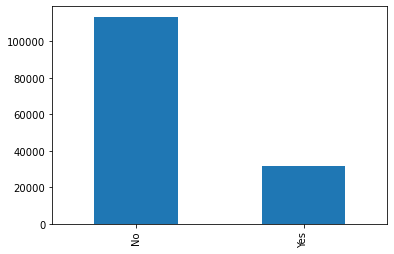

In [17]:
rain['RainTomorrow'].value_counts().plot(kind='bar')


#### 2. Bi-variate Analysis:
a) Sunshine vs Rainfall:

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

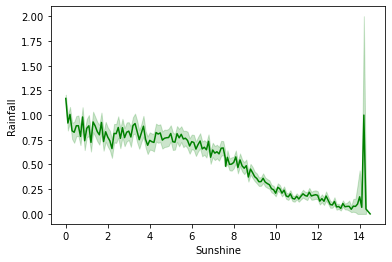

In [18]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')

Sunshine feature is inversely proportional to the Rainfall feature.

#### b) Sunshine vs Evaporation:

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

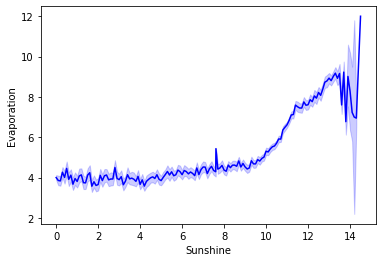

In [19]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='blue')


Sunshine feature is proportional to the Evaporation feature.



#### 3. Multivariate Analysis:

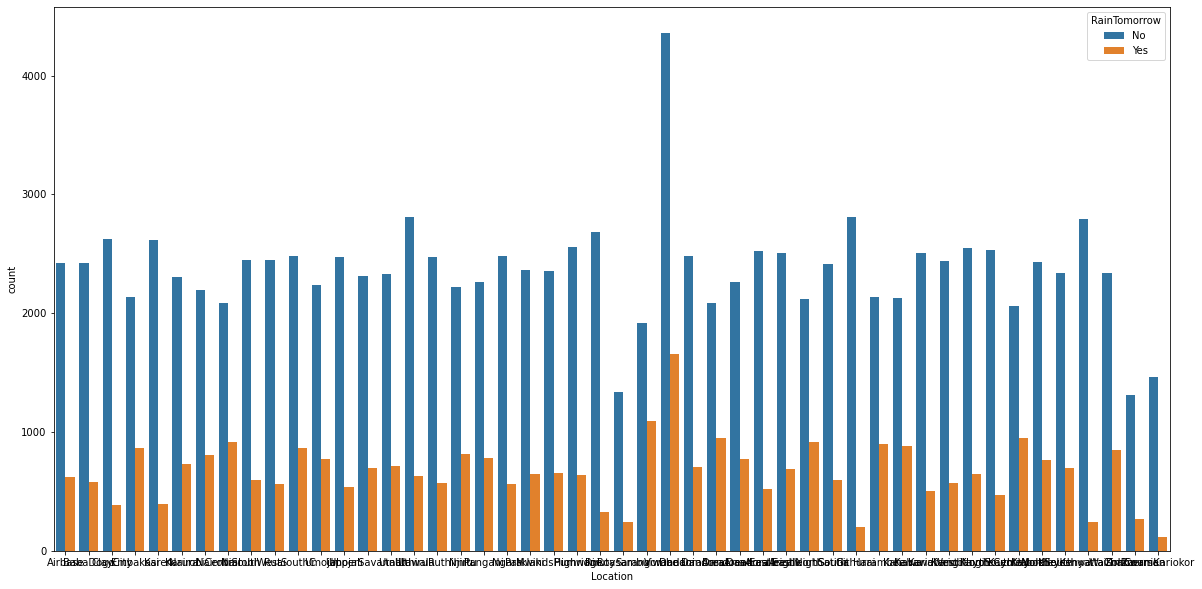

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

### 8.  Encoding of Categorical Features:

In [21]:
def encode_data(feature_name):
    
    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,1,12
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,2,12
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,3,12
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,4,12
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,5,12


### 9. Correlation

RainTomorrow     1.000000
Humidity3pm      0.433179
Rainfall         0.326279
RainToday        0.305744
Cloud3pm         0.298050
Humidity9am      0.252243
Cloud9am         0.249978
WindGustSpeed    0.218517
WindSpeed9am     0.084866
MinTemp          0.082177
WindSpeed3pm     0.081098
day              0.008788
WindDir9am       0.007337
month           -0.000947
Location        -0.007686
WindDir3pm      -0.013087
year            -0.014141
Temp9am         -0.025460
WindGustDir     -0.056856
Evaporation     -0.099526
MaxTemp         -0.156656
Temp3pm         -0.187734
Pressure3pm     -0.210585
Pressure9am     -0.229573
Sunshine        -0.321533
Name: RainTomorrow, dtype: float64 



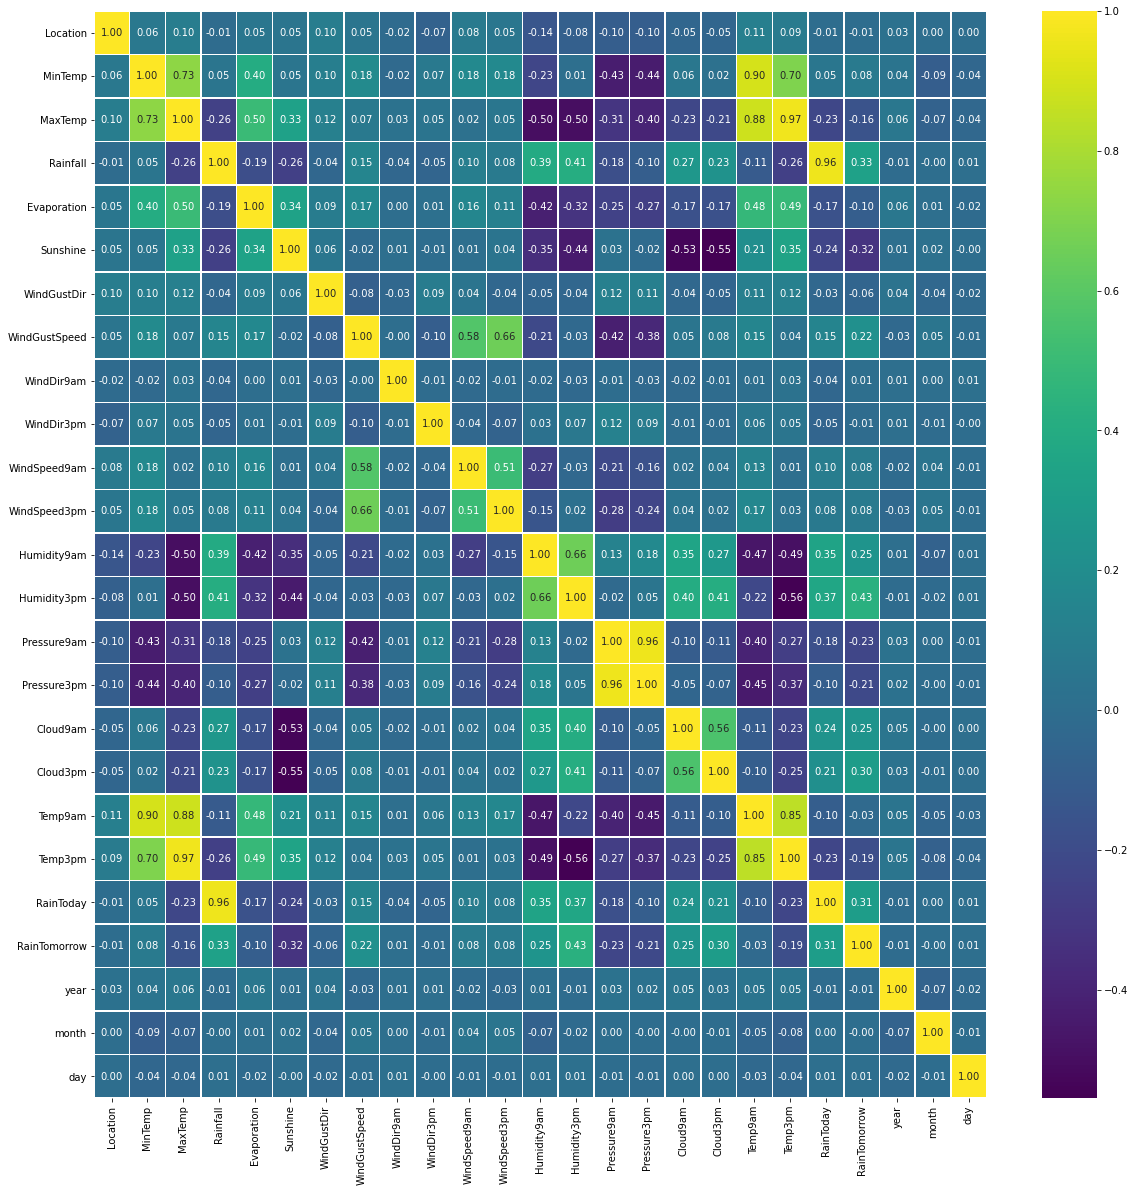

In [22]:
correlation = rain.corr()
rain_correlation = correlation['RainTomorrow'].sort_values(ascending=False)
print(rain_correlation, '\n')

#Displaying Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation, linewidths=0.5, annot=True, fmt=".2f", cmap = 'viridis')
plt.show()

In [23]:
# Splitting data into Independent Features and Dependent Features:
X = rain [['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindDir9am', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
           'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
y = rain['RainTomorrow']

### 10. Feature Importance
I’ll be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.09839846, 0.05142   , 0.10261487, 0.07828081, 0.08037186,
       0.08231273, 0.09449097, 0.24532592, 0.05248561, 0.05773441,
       0.05656435])

MinTemp          0.098398
Rainfall         0.051420
WindGustSpeed    0.102615
WindDir9am       0.078281
WindSpeed9am     0.080372
WindSpeed3pm     0.082313
Humidity9am      0.094491
Humidity3pm      0.245326
Cloud9am         0.052486
Cloud3pm         0.057734
RainToday        0.056564
dtype: float64

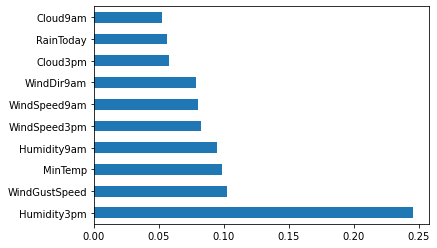

In [25]:
# visualize feature importance values:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
feature_imp

### 11. Splitting Data into training and testing set:

In [26]:
#train_test_split() is a method of model_selection class used to split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#Length of Training and Testing set:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


### 12. Feature Scaling:
Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. StandardScaler is a class used to implement feature scaling.



In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 13. Model Building:

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### (i) Logistic Regression
Model Training

In [29]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

Model Testing:

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8405747284476832


Checking for Overfitting and Under Fitting:

In [32]:
print("Train Data Score: {}".format(classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier.score(X_test, y_test)))

Train Data Score: 0.8386583940602227
Test Data Score: 0.8405747284476832


In [33]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[21539  1187]
 [ 3451  2915]]


In [34]:
# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



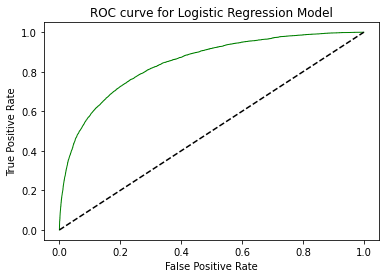

In [35]:
# Receiver operating characteristic(ROC) curve:
# predicting probabilities:
y_pred_logreg_proba = classifier.predict_proba(X_test)

# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

# Plotting ROC curve:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [36]:
#Finding whether model performance can be improved using Cross Validation Score:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.83934863 0.83702844 0.84123915 0.83654879 0.83947063]
Average cross-validation score: 0.8387271291520293


The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.

#### (ii) Random Forest


In [37]:
from sklearn.ensemble import RandomForestClassifier

Model Training

In [38]:
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

Model Testing

In [39]:
y_pred_rf = classifier_rf.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.845490169118658


Checking for Overfitting and Under Fitting:

In [40]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.9996734497456345
Test Data Score: 0.845490169118658


In [41]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_rf))

Confusion Matrix:

 [[21622  1104]
 [ 3391  2975]]


In [42]:
# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred_rf))

classification_report:

               precision    recall  f1-score   support

           0       0.86      0.95      0.91     22726
           1       0.73      0.47      0.57      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.83      0.85      0.83     29092



Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.

#### (iii) XGBoost 

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred_xgb = xgb.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_xgb)))

Accuracy Score: 0.8468994912690774


In [45]:
print("Train Data Score: {}".format(xgb.score(X_train, y_train)))
print("Test Data Score: {}".format(xgb.score(X_test, y_test)))

Train Data Score: 0.8668792107795957
Test Data Score: 0.8468994912690774


In [46]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_xgb))

# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred_xgb))

Confusion Matrix:

 [[21549  1177]
 [ 3277  3089]]
classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.72      0.49      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.74     29092
weighted avg       0.84      0.85      0.84     29092



### 14. Results and Conclusion:


Best Models in terms of accuracy (In my Experiment):
1) XGBoost
2) Random Forest
3) Logistic Regression

Best Models in terms of Computation Time (In my Experiment):
1) XGBoost
2) Logistic Regression
3) Random Forest

Comparison Table:

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

# Create and display the comparison table
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall],
    'F1-Score': [lr_f1, rf_f1, xgb_f1]
}

df = pd.DataFrame(data)
print(df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.840575   0.710629  0.457901  0.556935
1        Random Forest  0.845490   0.729345  0.467326  0.569651
2              XGBoost  0.846899   0.724098  0.485234  0.581076


## Conclusion

Among the models tested, XGBoost outperformed others in terms of accuracy, precision, recall, and F1-score, making it the most effective model for predicting rainfall in this context. Random Forest also showed strong performance but exhibited some overfitting, as indicated by the high training accuracy and slightly lower testing accuracy. Logistic Regression, while less complex, provided a good balance between computation time and accuracy.

## Recommendations

The project's objective of developing a robust model for rainfall prediction in Nairobi was achieved, with XGBoost emerging as the best performer. This model can serve as a valuable tool for sectors such as agriculture, where accurate rainfall prediction is crucial for decision-making and resource management.

1. Model Deployment: The XGBoost model, due to its superior performance, should be considered for deployment in real-time applications. Integration with local weather stations and government platforms could enhance weather prediction accuracy and provide timely alerts to farmers and other stakeholders.

2. Data Expansion: To further improve the model's accuracy, it is recommended to incorporate more recent weather data, possibly expanding beyond the current dataset. Additionally, integrating satellite data and other environmental variables could capture more complex patterns in rainfall prediction.

3. Regular Model Updates: The model should be periodically retrained and validated with new data to ensure its accuracy remains high. Regular updates will help the model adapt to changing climatic conditions and provide more reliable forecasts over time.

4. Further Research: It is advisable to explore other advanced algorithms and techniques, such as deep learning models, which might offer improvements in handling large datasets with complex relationships, potentially leading to even more accurate predictions.